In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [45]:
dataTrain = pd.read_csv("data.csv")  

In [46]:
dataTrain.head() 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [47]:
type(dataTrain) 

pandas.core.frame.DataFrame

In [48]:
dataTrain.shape 

(4600, 18)

In [49]:
dataTrain.isnull().sum() 

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [50]:
dataTrain = dataTrain.dropna() 

In [52]:
dataTrain.isnull().sum() 

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [53]:
dataTrain.shape

(4600, 18)

In [54]:
dataTrain.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

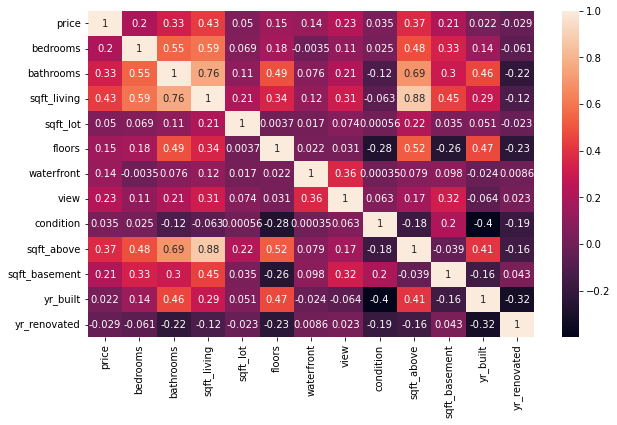

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
corr = dataTrain.corr()
##This is a pandas DataFrame method that is used to calculate the correlation between variables in the DataFrame.
sns.heatmap(corr,annot=True)
plt.show()

In [56]:
dataTrain.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


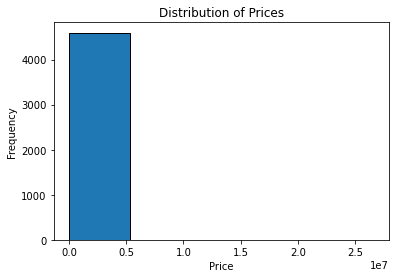

In [60]:
import matplotlib.pyplot as plt

dataTrain['price'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [61]:
dataTrain.describe(include = 'object') 

,date,street,city,statezip,country
count,4600,4600,4600,4600,4600
unique,70,4525,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1573,148,4600


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

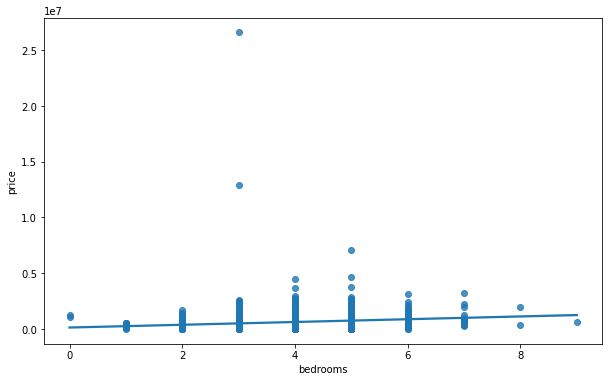

In [62]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="bedrooms", y="price", data=dataTrain) 

In [64]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['bedrooms'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.2003362893756762  with a P-value of P = 7.38206548293306e-43


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

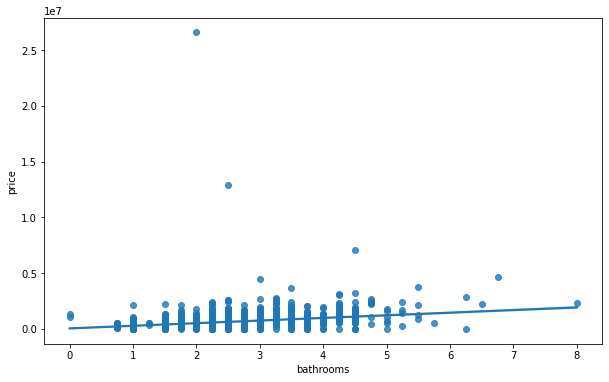

In [66]:
plt.figure(figsize=(10,6))
sns.regplot(x="bathrooms", y="price", data=dataTrain)

In [67]:
pearson_coef, p_value = stats.pearsonr(dataTrain['bathrooms'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.32710991828773484  with a P-value of P = 3.6446270244434027e-115


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

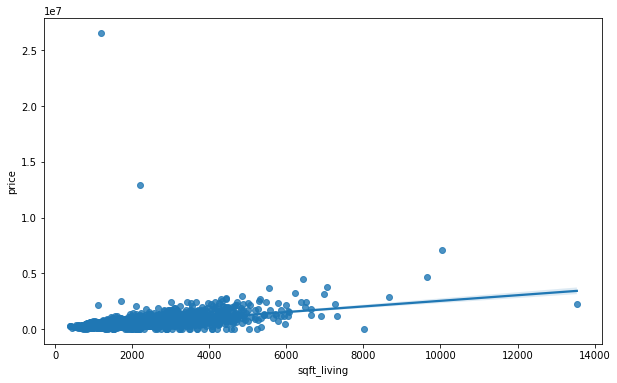

In [68]:
plt.figure(figsize=(10,6))
sns.regplot(x="sqft_living", y="price", data=dataTrain) 

In [69]:
pearson_coef, p_value = stats.pearsonr(dataTrain['sqft_living'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.43041002543262796  with a P-value of P = 7.549895925396118e-207


<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

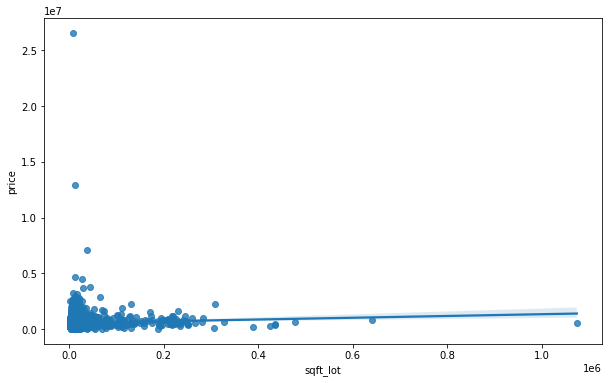

In [70]:
plt.figure(figsize=(10,6))
sns.regplot(x="sqft_lot", y="price", data=dataTrain)

In [71]:
pearson_coef, p_value = stats.pearsonr(dataTrain['sqft_lot'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.05045129503234884  with a P-value of P = 0.0006192879006961164


<AxesSubplot:xlabel='floors', ylabel='price'>

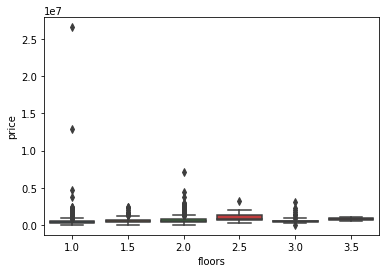

In [74]:
sns.boxplot(x="floors", y="price", data=dataTrain)

<AxesSubplot:xlabel='city', ylabel='price'>

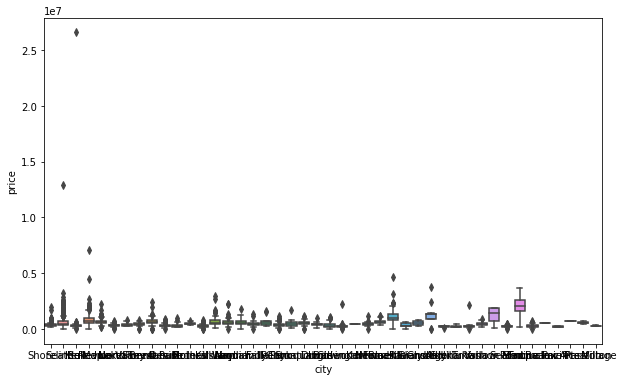

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(x="city", y="price", data=dataTrain)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

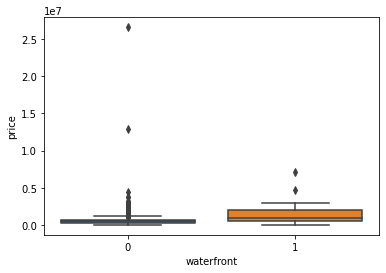

In [88]:
sns.boxplot(x="waterfront", y="price", data=dataTrain)

In [89]:
dataTrain.drop(['statezip', 'sqft_basement', 'yr_built','yr_renovated'], axis = 1, inplace = True)

In [90]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() 
data.date = labelencoder.fit_transform(data.date) 
data.city = labelencoder.fit_transform(data.city) 
data.street = labelencoder.fit_transform(data.street) 
data.country = labelencoder.fit_transform(data.country) 

In [91]:
dataTrain.shape

(4600, 14)

In [92]:
dataTrain.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,street,city,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,18810 Densmore Ave N,Shoreline,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,709 W Blaine St,Seattle,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,26206-26214 143rd Ave SE,Kent,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,857 170th Pl NE,Bellevue,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,9105 170th Ave NE,Redmond,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,522 NE 88th St,Seattle,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,2616 174th Ave NE,Redmond,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,23762 SE 253rd Pl,Maple Valley,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,46611-46625 SE 129th St,North Bend,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,6811 55th Ave NE,Seattle,USA


In [94]:
import scipy.stats as stats
data = stats.zscore(data)

In [95]:
dataTrain 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,street,city,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,18810 Densmore Ave N,Shoreline,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,709 W Blaine St,Seattle,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,26206-26214 143rd Ave SE,Kent,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,857 170th Pl NE,Bellevue,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,9105 170th Ave NE,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,501 N 143rd St,Seattle,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,14855 SE 10th Pl,Bellevue,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,759 Ilwaco Pl NE,Renton,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,5148 S Creston St,Seattle,USA


In [98]:
x_train=dataTrain.iloc[:,0:8]
y_train=dataTrain.iloc[:,9]

In [99]:
x_train.head() 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0


In [100]:
y_train.head()

0    3
1    5
2    4
3    4
4    4
Name: condition, dtype: int64

In [105]:
model = LinearRegression()
model_mlr = model.fit(x_train, y_train)

ValueError: could not convert string to float: '2014-05-02 00:00:00'

In [111]:
x_train['date'] = pd.to_datetime(x_train['date'])

In [113]:
y_pred1 = model_mlr.predict(x_test)

NameError: name 'model_mlr' is not defined

In [116]:
y_test[0]

NameError: name 'y_test' is not defined

In [115]:
y_pred1[0]

NameError: name 'y_pred1' is not defined

In [117]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

NameError: name 'y_test' is not defined

In [118]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [119]:
y_pred2 = model_rf.predict(x_test)

NameError: name 'model_rf' is not defined

In [120]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

NameError: name 'y_test' is not defined

In [121]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

NameError: name 'y_test' is not defined

In [122]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

NameError: name 'mae1' is not defined

In [123]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae 

NameError: name 'scores' is not defined

In [124]:
y_pred1 = model_mlr.predict(x_date_city_price)


NameError: name 'model_mlr' is not defined